In [1]:
import torch
import torch.nn as nn
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import scipy.io as sio
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

(4, 8, 8, 600)
(6, 16, 16, 600)
0.0037141256034374237 6.17997138760984e-05


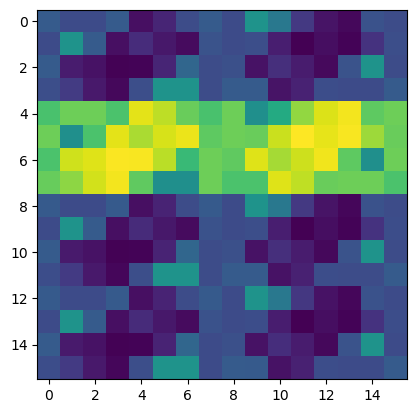

[-1.65272667e-03 -2.08346127e-03 -2.08346127e-03 -1.64621591e-03
 -3.48453084e-03 -3.03533161e-03 -2.04988220e-03 -1.63641770e-03
 -2.07773177e-03  6.26854890e-05 -7.84875883e-04 -2.55169999e-03
 -3.40313883e-03 -3.64814722e-03 -1.91765407e-03 -2.05831160e-03
 -2.07773177e-03  6.26854890e-05 -1.63250312e-03 -3.48723936e-03
 -2.84968293e-03 -3.31491488e-03 -3.56737548e-03 -1.88504020e-03
 -2.07773177e-03 -2.00725812e-03 -3.16967838e-03 -3.78498994e-03
 -3.51441163e-03 -3.72076663e-03 -2.69101490e-03 -2.00781669e-03
 -1.65004400e-03 -3.23409913e-03 -3.43402079e-03 -3.74838850e-03
 -3.71479825e-03 -3.02725378e-03 -1.32697471e-03 -2.05831160e-03
 -1.95659208e-03 -3.42751783e-03 -2.79423362e-03 -3.21698491e-03
 -3.61723965e-03 -1.87124102e-03  6.26854890e-05 -2.05831160e-03
 -2.00813403e-03 -2.50261812e-03 -3.27624776e-03 -3.64927552e-03
 -1.98129821e-03  6.26854890e-05  6.26854890e-05 -2.05831160e-03
 -1.65049708e-03 -1.63930515e-03 -3.41201737e-03 -3.08152335e-03
 -2.02232925e-03 -2.06859

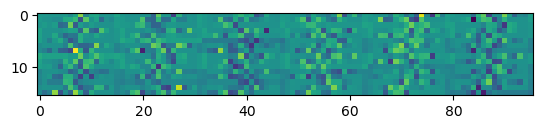

[ 0.00523644  0.00915253  0.00915253 ... -0.01545223 -0.01545223
 -0.01774672]


In [843]:
U = np.load("runs/U.npy")
X = np.load("runs/X.npy")
print(U.shape)
print(X.shape)
new_U = np.zeros((600, U.shape[0]*U.shape[1]*U.shape[2]))
new_X = np.zeros((600, X.shape[0]*X.shape[1]*X.shape[2]))
for i in range(U.shape[-1]):
    sample = U[:,:,:,i].squeeze()
    new_U[i] = sample.flatten()
    new_X[i] = X[:,:,:,i].flatten()
    
#scaler = StandardScaler()
#new_U = scaler.fit_transform(new_U)
print(new_U[0].max(), np.abs(new_U[0]).min())
plt.imshow(new_U[0].reshape(16,16))
plt.show()
print(new_U[0])

print(new_X[0].max(), np.abs(new_X[0]).min())
plt.imshow(new_X[2].reshape(16,96))
plt.show()
print(new_X[0])

(600, 3)
-0.009109827


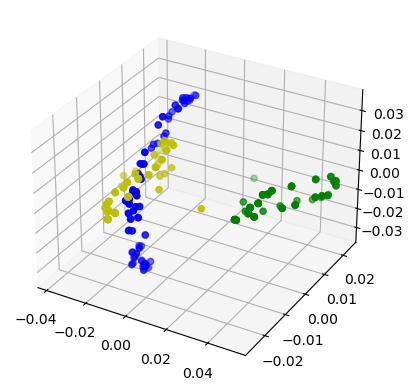

In [845]:
pca = PCA(n_components=3)
U_PCA = pca.fit_transform(new_U)
print(U_PCA.shape)
print(U.min())
#plt.scatter(U_PCA[:, 0], U_PCA[:, 1])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
indx = [0,300]
for idx in indx:
    ax.scatter(U_PCA[idx:100+idx, 0], U_PCA[idx:100+idx, 1], U_PCA[idx:100+idx, 2], c='g', marker='o')
    ax.scatter(U_PCA[100+idx:200+idx, 0], U_PCA[100+idx:200+idx, 1], U_PCA[100+idx:200+idx, 2], c='y', marker='o')
    ax.scatter(U_PCA[200+idx:300+idx, 0], U_PCA[200+idx:300+idx, 1], U_PCA[200+idx:300+idx, 2], c='b', marker='o')

(4, 8, 8, 600)
0.027580028399825096 0.004624539520591497


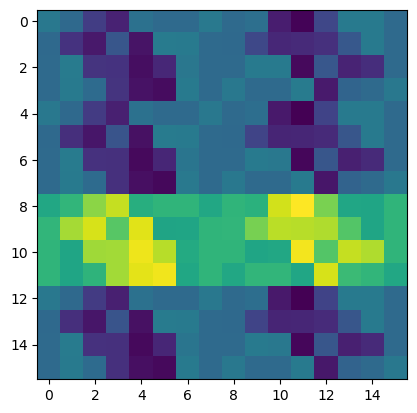

[-0.0054266  -0.00868252 -0.01754712 -0.02235693 -0.00696278 -0.00859534
 -0.00859534 -0.00538948 -0.00855433 -0.00735835 -0.02330758 -0.02702678
 -0.0159654  -0.00506676 -0.00486103 -0.00854487 -0.0086842  -0.01949459
 -0.02376059 -0.01280133 -0.0246384  -0.00462454 -0.00486103 -0.00854487
 -0.00864932 -0.01569704 -0.02156769 -0.0210284  -0.02005587 -0.01242319
 -0.00486103 -0.00854487 -0.00855433 -0.00475296 -0.01929219 -0.01949771
 -0.02557083 -0.02138647 -0.00584144 -0.00854487 -0.00855433 -0.00486103
 -0.00499853 -0.02616172 -0.01272298 -0.02216555 -0.02040429 -0.00854487
 -0.00855433 -0.00486103 -0.00823848 -0.01934074 -0.0248649  -0.02572007
 -0.00500012 -0.00854487 -0.0054395  -0.00860632 -0.00860632 -0.0046381
 -0.02357644 -0.00979518 -0.00860632 -0.00543095 -0.0055149  -0.00868931
 -0.01804233 -0.02283784 -0.00710727 -0.00860209 -0.00860209 -0.00554214
 -0.00855615 -0.00773347 -0.02394518 -0.02762407 -0.01646607 -0.00506552
 -0.0048649  -0.00854971 -0.00868636 -0.02019908 -0.

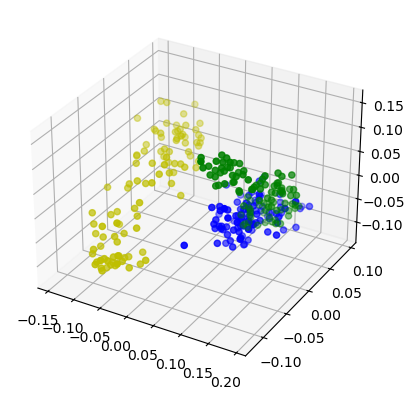

In [275]:
U = np.load("runs/test_U.npy")
print(U.shape)

new_U = np.zeros((600, U.shape[0]*U.shape[1]*U.shape[2]))
for i in range(U.shape[-1]):
    sample = U[:,:,:,i].squeeze()
    new_U[i] = sample.flatten()
    
print(new_U[0].max(), np.abs(new_U[0]).min())
plt.imshow(new_U[0].reshape(16,16))
plt.show()
print(new_U[0])

pca = PCA(n_components=3)
U_PCA = pca.fit_transform(new_U)
print(U_PCA.shape)

print(U.min())
#plt.scatter(U_PCA[:, 0], U_PCA[:, 1])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
indx = [0,]
for idx in indx:
    ax.scatter(U_PCA[idx:100+idx, 0], U_PCA[idx:100+idx, 1], U_PCA[idx:100+idx, 2], c='g', marker='o')
    ax.scatter(U_PCA[100+idx:200+idx, 0], U_PCA[100+idx:200+idx, 1], U_PCA[100+idx:200+idx, 2], c='y', marker='o')
    ax.scatter(U_PCA[200+idx:300+idx, 0], U_PCA[200+idx:300+idx, 1], U_PCA[200+idx:300+idx, 2], c='b', marker='o')

(2, 4, 4, 600)
(4, 4, 4, 600)
0.0016237054951488972 0.0005274830618873239


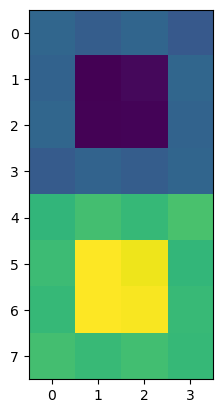

[-0.0005408  -0.0006465  -0.00055339 -0.00070143 -0.00059225 -0.00160016
 -0.00153147 -0.00053687 -0.00054186 -0.00158456 -0.00156985 -0.00057845
 -0.00067191 -0.0005749  -0.00065413 -0.00055097  0.00052748  0.00066277
  0.00056073  0.00070314  0.00060897  0.00162371  0.00154772  0.00053524
  0.00055459  0.00161272  0.00158814  0.00057446  0.00066589  0.00057542
  0.00065039  0.00055801]
0.00970053393393755 0.0069314418360590935


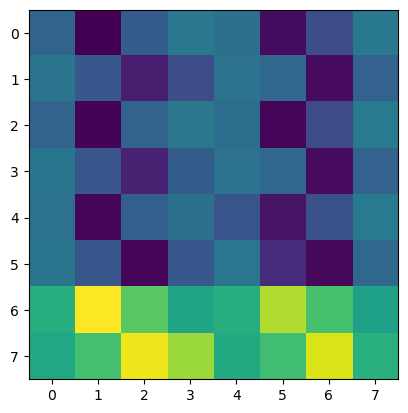

[-0.00759464 -0.00969026 -0.00832453 -0.0072668  -0.0092204  -0.00962619
 -0.00944145 -0.00703766 -0.00699226 -0.00955359 -0.00964269 -0.00883593
 -0.00727531 -0.00863952 -0.00964047 -0.00709445 -0.00754489 -0.00968761
 -0.00820516 -0.00732325 -0.00923196 -0.00962434 -0.00943577 -0.00706344
 -0.00693144 -0.0095706  -0.00965074 -0.00873373 -0.00731211 -0.00865926
 -0.00963977 -0.00701085 -0.00761658 -0.00967859 -0.00836139 -0.00706883
 -0.00926227 -0.00960222 -0.00939028 -0.00704327 -0.00693915 -0.00954137
 -0.00964628 -0.00875611 -0.0070047  -0.00895585 -0.00967475 -0.00726881
  0.00780627  0.00970053  0.00862541  0.00704895  0.00924368  0.0096245
  0.00943109  0.00708444  0.00709482  0.00951212  0.00962518  0.00905157
  0.00708314  0.00878529  0.00965874  0.00742811]


In [276]:
U = np.load("runs/U2.npy")
X = np.load("runs/X2.npy")
print(U.shape)
print(X.shape)
new_U = np.zeros((600, U.shape[0]*U.shape[1]*U.shape[2]))
new_X = np.zeros((600, X.shape[0]*X.shape[1]*X.shape[2]))
for i in range(U.shape[-1]):
    sample = U[:,:,:,i].squeeze()
    new_U[i] = sample.flatten()
    new_X[i] = X[:,:,:,i].flatten()
    
#scaler = StandardScaler()
#new_U = scaler.fit_transform(new_U)
print(new_U[0].max(), np.abs(new_U[0]).min())
plt.imshow(new_U[0].reshape(8,4))
plt.show()
print(new_U[0])

print(new_X[0].max(), np.abs(new_X[0]).min())
plt.imshow(new_X[2].reshape(8,8))
plt.show()
print(new_X[0])

(600, 3)
-0.007926872


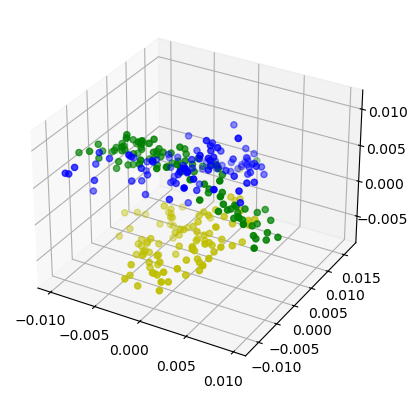

In [277]:
pca = PCA(n_components=3)
U_PCA = pca.fit_transform(new_U)
print(U_PCA.shape)

print(U.min())
#plt.scatter(U_PCA[:, 0], U_PCA[:, 1])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
indx = [0]
for idx in indx:
    ax.scatter(U_PCA[idx:100+idx, 0], U_PCA[idx:100+idx, 1], U_PCA[idx:100+idx, 2], c='g', marker='o')
    ax.scatter(U_PCA[100+idx:200+idx, 0], U_PCA[100+idx:200+idx, 1], U_PCA[100+idx:200+idx, 2], c='y', marker='o')
    ax.scatter(U_PCA[200+idx:300+idx, 0], U_PCA[200+idx:300+idx, 1], U_PCA[200+idx:300+idx, 2], c='b', marker='o')

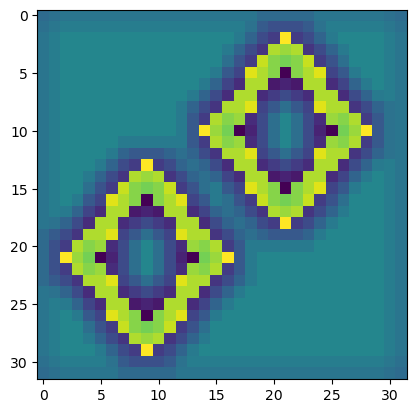

In [168]:
X = sio.loadmat("Video_train.mat")
video = X['M']
video.shape
plt.imshow(video[0][300])

In [332]:
test = torch.load("runs/checkpoint.pth.tar")
print(test.keys())

dict_keys(['epoch', 'model_state_dict'])


In [6]:
conv = nn.ConvTranspose2d(1,1,4,2,1)

x = torch.rand(1,1,16,16)
y = conv(x)
print(y.shape)

torch.Size([1, 1, 32, 32])


In [27]:
def Correntropy(y, sigma):
    y = y.flatten(start_dim=1)
    batch_size, dim = y.shape
    batch_correntropy =  torch.sum(torch.exp(-torch.abs(y) / sigma**2), axis=-1) / dim
    return torch.sum(1 - batch_correntropy) / batch_size

In [9]:
C = nn.ConvTranspose2d(128, 1, kernel_size=7, stride=1, padding=3, bias=False).to(device)   

state = torch.rand(1, 128, 32, 32).to(device)
print(C(state).shape)

state.flatten(start_dim=1).shape

print(Correntropy(state.flatten(start_dim=1), 0.1))

torch.Size([1, 1, 32, 32])
tensor(0.0097, device='cuda:0')


In [78]:
C = nn.ConvTranspose2d(128, 1, kernel_size=7, stride=1, padding=3, bias=False).to(device)
A = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=False).to(device)
def inference(data):
    batch_size, c, h, w, T = data.shape
    
    # initialize the state
    xt_1 = torch.rand((batch_size, 128, 32, 32), 
                        requires_grad=False, device=device)
    for t in range(T):
        yt = data[:, :, :, :, t]
        xt = torch.rand((batch_size, 128, 32, 32), 
                        requires_grad=True, device=device)
        print("old", torch.sum(torch.abs(xt)))
        opt = torch.optim.Adam([xt], lr=0.005)
        for _ in range(100):
            # from state to reconstruction
            Cxt = C(xt)
            # from current state to next state
            xt_hat = A(xt_1)
            loss = torch.square(torch.norm(yt - Cxt)) + 0.3 * Correntropy(xt-xt_hat, 0.01) + Correntropy(xt, 0.01)
            loss.backward()
            opt.step()
            opt.zero_grad()
        print("new", torch.sum(torch.abs(xt)),'\n')
        xt_1 = xt.detach().clone()
        
    return xt

data = torch.rand(2, 1, 32, 32, 5).to(device)
x = inference(data)
print(x.shape)

old tensor(131046.8516, device='cuda:0', grad_fn=<SumBackward0>)
new tensor(130647.3594, device='cuda:0', grad_fn=<SumBackward0>) 

old tensor(130973.3906, device='cuda:0', grad_fn=<SumBackward0>)
new tensor(130545.3125, device='cuda:0', grad_fn=<SumBackward0>) 

old tensor(131181.3125, device='cuda:0', grad_fn=<SumBackward0>)
new tensor(130778.6641, device='cuda:0', grad_fn=<SumBackward0>) 

old tensor(131084.8125, device='cuda:0', grad_fn=<SumBackward0>)
new tensor(130678.0547, device='cuda:0', grad_fn=<SumBackward0>) 

old tensor(131000.8281, device='cuda:0', grad_fn=<SumBackward0>)
new tensor(130589.5000, device='cuda:0', grad_fn=<SumBackward0>) 

torch.Size([2, 128, 32, 32])
